In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cartopy.crs as ccrs
import numpy as np
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.ticker as mticker

In [2]:
year = "2011"
path = "/data/keeling/a/zzheng25/d/mam4_paper_data/chi_only/comp_analysis/"\
        +str(year)+"_"+"year_comp.nc"

var_ls = ["bc_a1","bc_a4","ncl_a1","ncl_a2",
          "pom_a1","pom_a4","soa_a1","soa_a2",
          "dst_a1","dst_a2","so4_a1","so4_a2"]

In [3]:
# convert the unit
ds = (xr.open_dataset(path)*10**9)
ds=ds.assign_coords(lon=(((ds.lon + 180) % 360) - 180))
ds=ds.reindex(lon=sorted(ds.lon))
ds=ds.rename_dims({'lon': 'longitude','lat': 'latitude'})\
.rename({'lon': 'longitude','lat': 'latitude'})

In [4]:
for var in var_ls:
    display(ds[var+"_SRF"].to_dataframe().describe().transpose())

,count,mean,std,min,25%,50%,75%,max
bc_a1_SRF,55296.0,0.055502,0.194555,0.000009,0.000313,0.003977,0.034088,5.698347


,count,mean,std,min,25%,50%,75%,max
bc_a4_SRF,55296.0,0.029081,0.123463,0.000007,0.000384,0.002682,0.009864,3.040183


,count,mean,std,min,25%,50%,75%,max
ncl_a1_SRF,55296.0,0.373979,0.355941,0.001202,0.022025,0.273962,0.681548,1.889754


,count,mean,std,min,25%,50%,75%,max
ncl_a2_SRF,55296.0,0.001518,0.002196,9.945974e-08,0.000044,0.00062,0.001851,0.011928


,count,mean,std,min,25%,50%,75%,max
pom_a1_SRF,55296.0,0.246758,0.708043,0.000059,0.00203,0.024694,0.183168,15.100246


,count,mean,std,min,25%,50%,75%,max
pom_a4_SRF,55296.0,0.159298,0.656892,0.000021,0.001834,0.00995,0.051457,31.736672


,count,mean,std,min,25%,50%,75%,max
soa_a1_SRF,55296.0,0.498003,1.384739,0.00004,0.001148,0.017033,0.288053,15.510425


,count,mean,std,min,25%,50%,75%,max
soa_a2_SRF,55296.0,0.001014,0.002664,8.205431e-10,0.000005,0.00003,0.000688,0.073197


,count,mean,std,min,25%,50%,75%,max
dst_a1_SRF,55296.0,0.293594,1.31641,0.000024,0.000798,0.009533,0.060699,40.29194


,count,mean,std,min,25%,50%,75%,max
dst_a2_SRF,55296.0,0.000165,0.001173,1.002458e-09,2.412864e-07,0.000001,0.000011,0.047973


,count,mean,std,min,25%,50%,75%,max
so4_a1_SRF,55296.0,0.467617,1.00455,0.002492,0.043917,0.153266,0.39909,21.32616


,count,mean,std,min,25%,50%,75%,max
so4_a2_SRF,55296.0,0.005721,0.011534,0.000056,0.002421,0.004063,0.005544,0.720876


/data/keeling/a/zzheng25/miniconda3/envs/partmc/lib/python3.6/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/data/keeling/a/zzheng25/miniconda3/envs/partmc/lib/python3.6/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/data/keeling/a/zzheng25/miniconda3/envs/partmc/lib/python3.6/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Adding a

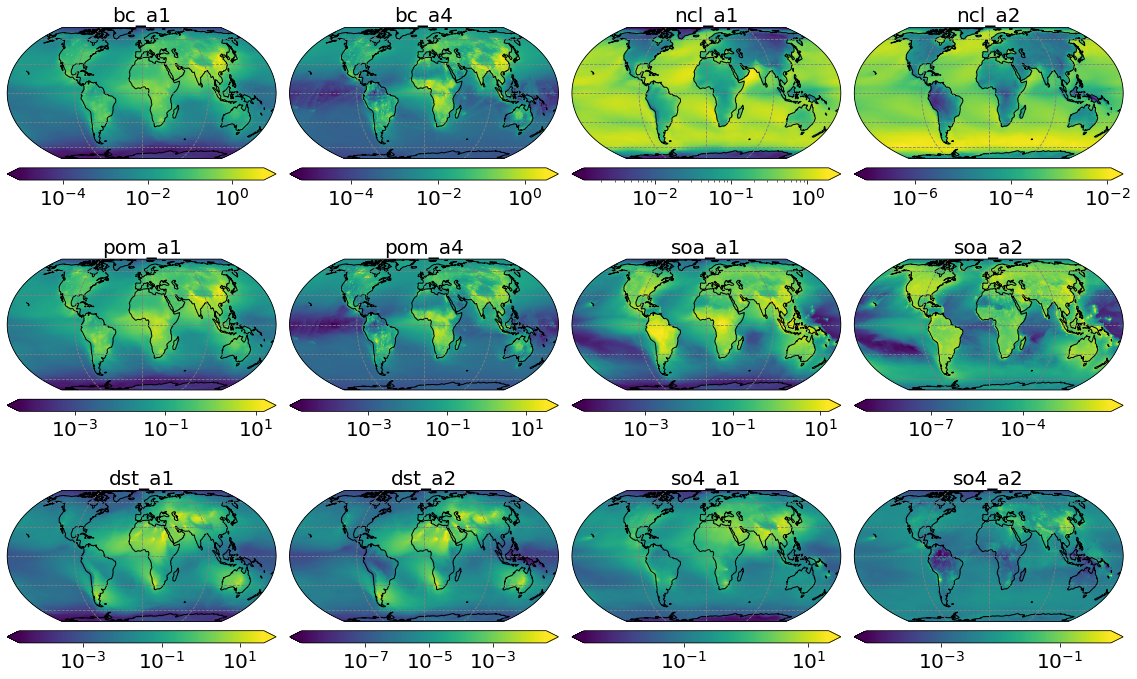

CPU times: user 1min 46s, sys: 5.04 s, total: 1min 51s
Wall time: 1min 45s


In [5]:
%%time
lons=np.asarray(ds.longitude)
lats=np.asarray(ds.latitude)
xx, yy = np.meshgrid(lons, lats)

rc={'axes.labelsize':20, 'font.size':20, 'legend.fontsize':20, 'axes.titlesize':20}
plt.rcParams.update(**rc)

crs = ccrs.EqualEarth()

fig = plt.figure(figsize=(20, 10))
spec2 = matplotlib.gridspec.GridSpec(ncols=4, nrows=3, figure=fig,
                                     wspace=.05, hspace=.25,
                                     bottom=.05, top=.95)
axes = []
f0 = fig.add_subplot(spec2[0, 0],projection=ccrs.EqualEarth())
f1 = fig.add_subplot(spec2[0, 1],projection=ccrs.EqualEarth())
f2 = fig.add_subplot(spec2[0, 2],projection=ccrs.EqualEarth())
f3 = fig.add_subplot(spec2[0, 3],projection=ccrs.EqualEarth())
axes.append([f0,f1,f2,f3])

f0 = fig.add_subplot(spec2[1, 0],projection=ccrs.EqualEarth())
f1 = fig.add_subplot(spec2[1, 1],projection=ccrs.EqualEarth())
f2 = fig.add_subplot(spec2[1, 2],projection=ccrs.EqualEarth())
f3 = fig.add_subplot(spec2[1, 3],projection=ccrs.EqualEarth())
axes.append([f0,f1,f2,f3])

f0 = fig.add_subplot(spec2[2, 0],projection=ccrs.EqualEarth())
f1 = fig.add_subplot(spec2[2, 1],projection=ccrs.EqualEarth())
f2 = fig.add_subplot(spec2[2, 2],projection=ccrs.EqualEarth())
f3 = fig.add_subplot(spec2[2, 3],projection=ccrs.EqualEarth())
axes.append([f0,f1,f2,f3])


for i in range(12):
    ax = plt.subplot(spec2[i],projection=crs)
    
    ax.coastlines()
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    #ax.set_title("("+char_list[i]+")")
    ax.set_title(var_ls[i])

    zz = ds[var_ls[i]+"_SRF"]
    p = ax.pcolormesh(xx, yy, zz,
                      norm=colors.LogNorm(vmin=zz.min(), vmax=zz.max()),
                      rasterized=True,
                      transform=ccrs.PlateCarree())
                      #cmap='RdBu')
    gl=ax.gridlines(color='grey', linestyle='--', draw_labels=False)
    gl.xlocator = mticker.FixedLocator([-90, 0, 90])
    
    cb = plt.colorbar(p,orientation='horizontal',
                      fraction=0.07,pad=0.05,extend='both')
    cb.solids.set_rasterized(True)


plt.tight_layout()
plt.savefig('../figures/species_dist.pdf',dpi=188)

plt.show()